In [67]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import pandas as pd
from datetime import datetime
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials


In [2]:
### ONLY RUN ONCE! ###
#download data from firebase
cred = credentials.Certificate("../pc_basestation/fb_key.json")
firebase_admin.initialize_app(cred, {'databaseURL': 'https://haucs-monitoring-default-rtdb.firebaseio.com'})

In [ ]:
## ONLY RUN TO REFRESH DATA! ###
ref = db.reference('/')
data = ref.get()

In [5]:
### RUN TO SAVE JSON FILE LOCALLY ###
with open('latest_data.json', 'w') as f:
    json.dump(data, f)

In [80]:
class bmass_sensor():

    def __init__(self, name, data):
        self.d_dt = [datetime.fromisoformat(i) for i in data[name]['data']]
        self.s_dt = [datetime.fromisoformat(i) for i in data[name]['status']]
        self.on = np.array([int(data[name]['data'][i][1]) for i in data[name]['data']])
        self.off = np.array([int(data[name]['data'][i][0]) for i in data[name]['data']])
        self.g = np.array([int(data[name]['data'][i][2]) for i in data[name]['data']])


bm1 = bmass_sensor('bmass_1', data)
bm2 = bmass_sensor('bmass_2', data)
bm3 = bmass_sensor('bmass_3', data)
bm4 = bmass_sensor('bmass_4', data)
bm5 = bmass_sensor('bmass_5', data)


In [71]:
def moving_average(x, n=4):
    '''
    Simple moving average filter
    '''
    filter = np.ones(n) / n
    return np.convolve(x, filter, 'same')

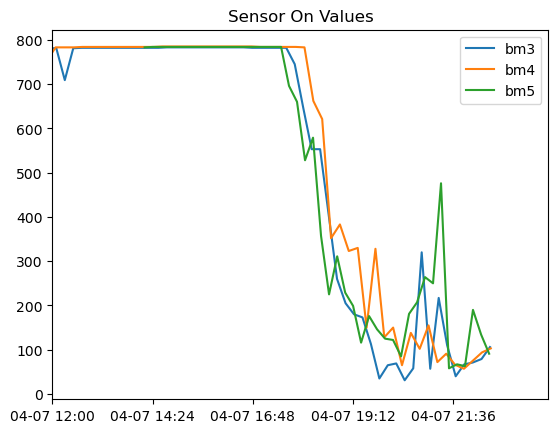

In [90]:
# Set date format for x-axis labels
date_fmt = '%m-%d %H:%M'
# Use DateFormatter to set the data to the correct format.
date_formatter = mdates.DateFormatter(date_fmt)

bm3_t = mdates.date2num(bm3.d_dt)
bm4_t = mdates.date2num(bm4.d_dt)
bm5_t = mdates.date2num(bm5.d_dt)

lower = mdates.date2num(datetime(2023, 4, 7, hour=12))
#plot
plt.figure()
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.plot(bm3_t, bm3.on)
plt.plot(bm4_t, bm4.on)
plt.plot(bm5_t, bm5.on)
plt.xlim(left=lower)
plt.title("Sensor On Values")
plt.legend(['bm3', 'bm4', 'bm5'])
plt.show()